In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df_temp =  pd.read_csv("nwt_fq_4_10.txt",sep=' ',names=['X_a','Y_a','Z_a','X_ω','Y_ω','Z_ω'])
a1 = df_temp[df_temp['Z_ω']== 1000].index.tolist() #判断Z_ω=1000的次数，a1/2为动作次数
print('nwt_fq_4_10文件 动作次数是：',len(a1)/2) 

nwt_fq_4_10文件 动作次数是： 118.0


In [3]:
a1

[0,
 165,
 166,
 307,
 308,
 429,
 430,
 557,
 558,
 676,
 677,
 799,
 800,
 911,
 912,
 1035,
 1036,
 1159,
 1160,
 1280,
 1281,
 1397,
 1398,
 1521,
 1522,
 1650,
 1651,
 1761,
 1762,
 1892,
 1893,
 2011,
 2012,
 2142,
 2143,
 2246,
 2247,
 2361,
 2362,
 2477,
 2478,
 2598,
 2599,
 2721,
 2722,
 2842,
 2843,
 2968,
 2969,
 3089,
 3090,
 3223,
 3224,
 3339,
 3340,
 3447,
 3448,
 3581,
 3582,
 3732,
 3733,
 3875,
 3876,
 3952,
 3953,
 4041,
 4042,
 4130,
 4131,
 4253,
 4254,
 4388,
 4389,
 4509,
 4510,
 4630,
 4631,
 4742,
 4743,
 4887,
 4888,
 5011,
 5012,
 5141,
 5142,
 5297,
 5298,
 5419,
 5420,
 5549,
 5550,
 5670,
 5671,
 5787,
 5788,
 5904,
 5905,
 6027,
 6028,
 6144,
 6145,
 6257,
 6258,
 6359,
 6360,
 6487,
 6488,
 6625,
 6626,
 6736,
 6737,
 6857,
 6858,
 6997,
 6998,
 7178,
 7179,
 7337,
 7338,
 7449,
 7450,
 7579,
 7580,
 7707,
 7708,
 7812,
 7813,
 7937,
 7938,
 8055,
 8056,
 8180,
 8181,
 8299,
 8300,
 8414,
 8415,
 8550,
 8551,
 8678,
 8679,
 8795,
 8796,
 8927,
 8928,
 9

In [4]:
sub_df = {}
df = {}
for i in range(0,int(len(a1)/2)):
    sub_df[i] = df_temp.iloc[a1[i*2]+1:a1[(i*2)+1]] #切割：将每次动作切割出来
    print(i,sub_df[i])
    sub_df[i] = sub_df[i].rolling(window = 5).mean()
    sub_df[i] = sub_df[i].reset_index(drop=True) #重新定义行索引从0开始
    df_max = sub_df[i]['Z_ω'].idxmax() #找到Z_ω最大值点对应的行索引
    df[i] = sub_df[i].loc[df_max-24:df_max+25].reset_index(drop=True).fillna(0)
    #根据Z_ω行索引 提取动作段，前25个数据，后25个数据

0           X_a       Y_a       Z_a        X_ω        Y_ω        Z_ω
1    1.035156 -0.154785 -0.020508  -2.378049  -2.743902  -3.780488
2    1.043457 -0.158691 -0.010742  -2.378049  -2.743902  -3.780488
3    1.046875 -0.161621 -0.021484  -2.378049  -2.743902  -3.780488
4    1.035156 -0.157715 -0.023926  -2.378049  -2.743902  -3.780488
5    1.031250 -0.155762 -0.019531  -2.378049  -2.743902  -3.780488
..        ...       ...       ...        ...        ...        ...
160  1.030273 -0.413574 -0.025391   8.170732  12.560976  14.878049
161  1.014160 -0.370117  0.031738  11.097561  14.146341  15.365854
162  1.003906 -0.410645  0.013672  13.475610  15.487805  18.902440
163  1.034668 -0.419922  0.037109  12.195122  18.536585  22.317074
164  1.034668 -0.409668  0.045898  14.268293  23.231709  24.573172

[164 rows x 6 columns]
1           X_a       Y_a       Z_a        X_ω        Y_ω        Z_ω
167  1.023438 -0.077148  0.000000 -86.707320 -32.865856  28.536587
168  1.149414 -0.174805  0.095215 

28            X_a       Y_a       Z_a        X_ω        Y_ω         Z_ω
3449  1.031738  0.031738 -0.007324   0.243902  -1.097561    2.743902
3450  1.018555  0.043457  0.007324   1.036585   0.000000    2.195122
3451  1.008301  0.022949 -0.033691   0.426829   1.219512    1.036585
3452  0.994141  0.042480 -0.023926  -0.853659   1.890244    0.000000
3453  1.010742  0.055664  0.005371  -2.012195   1.890244   -0.121951
...        ...       ...       ...        ...        ...         ...
3576  1.202637 -0.212402  0.157227  -4.695122  88.719510 -147.073180
3577  1.166504 -0.194336  0.076660  32.560978  83.841470 -156.097560
3578  1.155273 -0.175293 -0.029297  42.743904  76.829270 -157.987810
3579  1.124512 -0.152344 -0.118652  30.060976  70.182930 -154.634160
3580  1.053223 -0.186523 -0.143555   8.170732  64.024390 -145.731700

[132 rows x 6 columns]
29            X_a       Y_a       Z_a         X_ω        Y_ω        Z_ω
3583  1.044922 -0.014160 -0.010742   -1.829268  -1.707317 -10.000000
3584

53            X_a       Y_a       Z_a         X_ω        Y_ω        Z_ω
6489  1.043945 -0.069336 -0.039062   -0.243902  -5.000000   4.207317
6490  1.042969 -0.062500 -0.033691   -0.304878  -4.146341   3.536585
6491  1.039551 -0.082031 -0.042480   -1.280488  -3.536585   1.707317
6492  1.033691 -0.051758 -0.028809   -2.256098  -2.865854  -1.280488
6493  1.034668 -0.042480 -0.022461   -2.073171  -2.621951  -3.231707
...        ...       ...       ...         ...        ...        ...
6620  0.856934 -0.481934 -0.359863  -55.609756 -47.682926  30.914635
6621  0.948242 -0.897461 -0.272461  -82.500000 -49.817074  55.853660
6622  1.079102 -0.739258 -0.102051 -104.878050 -48.597560  82.560974
6623  1.779297  0.175293 -0.146484 -113.170730 -50.243904  92.439026
6624  1.262207 -0.663086  0.325684 -133.414640 -55.182930  73.780490

[136 rows x 6 columns]
54            X_a       Y_a       Z_a        X_ω        Y_ω        Z_ω
6627  1.027344 -0.041016 -0.067383   1.951220  -4.329268  -8.597561
6628  

76            X_a       Y_a       Z_a        X_ω        Y_ω        Z_ω
9447  1.009766  0.009766 -0.026855  -0.487805   0.121951  -0.670732
9448  1.015137 -0.001953 -0.029785  -0.487805   0.121951  -0.670732
9449  1.010254  0.002441 -0.031250  -0.487805   0.121951  -0.670732
9450  1.006348  0.004883 -0.023926  -0.487805   0.121951  -0.670732
9451  1.013184  0.014160 -0.015625  -0.487805   0.121951  -0.670732
...        ...       ...       ...        ...        ...        ...
9569  1.048828  0.105469  0.013184  51.341465 -32.439026 -21.768293
9570  1.179199  0.132324  0.148438  55.060978 -31.890245  -8.841464
9571  1.167969  0.123047  0.152344  41.768295 -31.036587  -4.512195
9572  1.113281  0.080566  0.069824  26.463415 -31.890245  -3.170732
9573  1.033203  0.059570  0.047852  19.512196 -33.353660  -1.158537

[127 rows x 6 columns]
77            X_a       Y_a       Z_a        X_ω        Y_ω        Z_ω
9576  1.022949  0.060547 -0.020996   0.731707   2.621951  -0.304878
9577  1.020996  0.

[103 rows x 6 columns]
102             X_a       Y_a       Z_a        X_ω        Y_ω       Z_ω
12616  1.011719 -0.041504 -0.096680  -0.975610   3.109756 -1.951220
12617  1.012207 -0.020020 -0.083008  -0.731707   3.597561 -1.707317
12618  1.015137 -0.032227 -0.079102  -0.365854   3.597561 -1.280488
12619  1.019043 -0.035645 -0.078125  -0.487805   3.353659 -0.426829
12620  1.008789 -0.041992 -0.092773  -0.670732   3.353659 -0.365854
...         ...       ...       ...        ...        ...       ...
12730  0.996094 -0.075195 -0.021484   9.146341 -13.902439  5.487805
12731  1.004395 -0.066406  0.003906   7.743903 -11.646341  4.756098
12732  1.015625 -0.080566 -0.021973   8.353659 -11.036586  4.451220
12733  1.036621 -0.073730 -0.017578   9.756098 -10.792684  4.146341
12734  1.019531 -0.066406 -0.020508  10.853659 -11.280488  4.024390

[119 rows x 6 columns]
103             X_a       Y_a       Z_a        X_ω        Y_ω       Z_ω
12737  1.014648 -0.088379 -0.089355  -0.182927   7.073171 -7.

In [5]:
for i in df:
    print(i,len(df[i]))

0 50
1 50
2 50
3 50
4 50
5 50
6 50
7 50
8 50
9 50
10 50
11 50
12 50
13 50
14 50
15 50
16 50
17 50
18 50
19 50
20 50
21 50
22 50
23 50
24 50
25 50
26 50
27 50
28 50
29 50
30 50
31 50
32 50
33 50
34 50
35 50
36 50
37 50
38 50
39 50
40 50
41 50
42 50
43 50
44 50
45 50
46 50
47 50
48 50
49 50
50 50
51 50
52 50
53 50
54 50
55 50
56 50
57 50
58 50
59 50
60 50
61 50
62 50
63 50
64 50
65 50
66 50
67 50
68 50
69 50
70 50
71 50
72 50
73 50
74 50
75 50
76 50
77 50
78 50
79 50
80 50
81 50
82 50
83 50
84 50
85 50
86 50
87 50
88 50
89 50
90 50
91 50
92 50
93 50
94 50
95 50
96 50
97 50
98 50
99 50
100 50
101 50
102 50
103 50
104 50
105 50
106 50
107 50
108 50
109 50
110 50
111 50
112 50
113 50
114 50
115 50
116 50
117 50


In [6]:
df[68]

X_a       Y_a       Z_a         X_ω         Y_ω          Z_ω
0    1.845215  1.617285  0.198437   51.000001   34.024392   -61.231709
1    2.158203  1.900000  0.224512   84.000001   35.487806  -154.121957
2    2.310547  1.612402  0.244922  107.768293   35.975610  -244.304887
3    2.462891  1.324805  0.265332  131.536586   36.463415  -334.487818
4    2.572949  0.934863  0.343555  129.682929   38.414635  -404.280504
5    2.586719  0.607324  0.376855  108.658538   38.317074  -446.524410
6    2.538672  0.315039  0.449316   91.463416   39.121953  -451.951240
7    2.471191  0.038086  0.550977   62.743904   42.670733  -458.914654
8    2.325391 -0.276367  0.667871   32.341465   49.658538  -467.134164
9    2.172656 -0.524121  0.615430   24.182928   59.634148  -470.536600
10   2.089258 -0.536816  0.509668   24.646342   71.573173  -477.926840
11   2.139453 -0.147656  0.316797   33.621953   86.853661  -475.670740
12   2.197070  0.056152  0.019531   37.768294  100.073173  -460.817076
13   2.479004  0.005762 -0.096875   38.426831  112.304883  -423.317076
14   2.731250 -0.118164 -0.107715   22.219514  119.109761  -362.719514
15   2.818457 -0.651953 -0.186426   -7.890243  122.170736  -268.512197
16   2.823145 -1.605469 -0.249219  -24.756098  125.707322  -143.024389
17   2.978906 -2.043555 -0.256250   -8.646341  136.817078    18.402439
18   3.264551 -2.211523 -0.446387   -1.109756  153.451224   208.439039
19   3.939551 -2.221289 -0.574609   -1.658536  172.634150   421.804893
20   5.005762 -1.894922 -0.600684    1.341464  185.134148   637.085396
21   6.272070 -1.258008 -0.606348  -10.987805  179.719513   831.426868
22   8.379980 -0.407129 -0.894824  -31.792683  158.243903   993.146380
23  10.625000  0.645605 -1.706152  -18.548781  126.426828  1121.390280
24  10.658398  3.061621 -1.409668   -7.951220   73.121949  1199.548820
25   9.231641  5.211328 -1.457617  -80.402440  -18.853663  1184.000020
26   7.449219  5.573535 -1.414355 -198.768302  -56.865860   990.756110
27   5.203223  5.290137 -0.704297 -270.512205  -62.475615   700.670742
28   2.222949  4.528418  0.843457 -297.963425  -69.256103   390.170730
29   1.020020  2.458691  0.939160 -268.939034  -60.829273    87.109750
30   0.897656  0.480176  1.209277 -136.597566   -1.560976  -147.963416
31   0.863770  0.148828  1.371875   52.414642   18.048781  -222.475614
32   0.392773  0.266016  1.159082  188.292692   11.670732  -203.719518
33   0.284180  0.681543  0.651855  230.243910    6.621952  -169.573176
34   0.391406  0.846680  0.400586  200.853665    6.743903  -131.743907
35   0.705762  0.991797  0.327930  138.451223    4.414634   -98.939029
36   1.074512  0.897266  0.286426   60.146339    6.621951   -72.695126
37   1.377344  0.585840  0.260547  -18.280490   12.731708   -63.621953
38   1.681934  0.239746  0.248535  -62.329269   21.951220   -75.829269
39   1.893555  0.069336  0.261523  -67.597562   32.439025  -103.378050
40   2.039746 -0.058984  0.254590  -62.768294   42.743904  -138.439026
41   2.147070 -0.122559  0.251367  -67.317074   49.768294  -174.817075
42   2.237793 -0.172852  0.191211  -75.378050   56.475610  -207.621956
43   2.262988 -0.203320  0.054297  -84.878051   63.085365  -231.329278
44   2.261719 -0.257227 -0.096094  -95.000004   68.158536  -245.951226
45   2.172852 -0.311230 -0.237891 -105.353664   72.536585  -252.073178
46   2.064160 -0.335059 -0.358887 -115.560980   76.707317  -250.109764
47   1.921875 -0.334082 -0.449512 -130.292686   79.317074  -240.890250
48   1.780078 -0.312500 -0.512305 -152.719516   81.182928  -226.682928
49   1.652344 -0.294824 -0.556445 -177.353662   82.756099  -208.804882

In [7]:
for i in df:
    for j in range(len(df[i])):
        if df[i].loc[j,'X_a'] == 0 and df[i].loc[j,'Y_a'] == 0 and df[i].loc[j,'Z_a'] == 0 and df[i].loc[j,'X_ω'] == 0 and df[i].loc[j,'Y_ω'] == 0 and df[i].loc[j,'Z_ω'] == 0:
            df[i].loc[j] = df[i-1].loc[j]
            

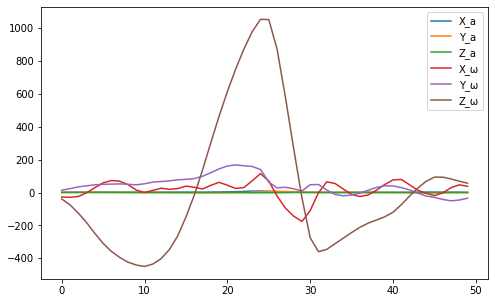

<Figure size 432x288 with 0 Axes>

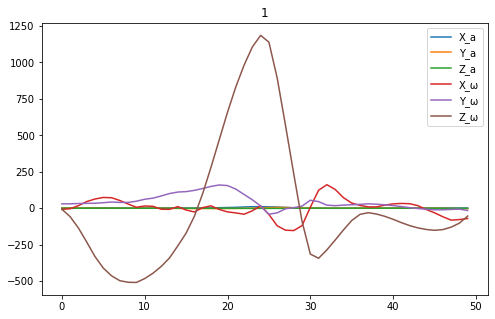

<Figure size 432x288 with 0 Axes>

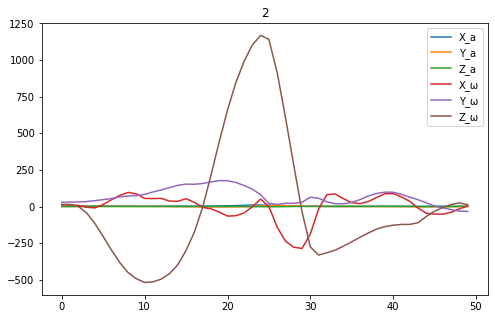

<Figure size 432x288 with 0 Axes>

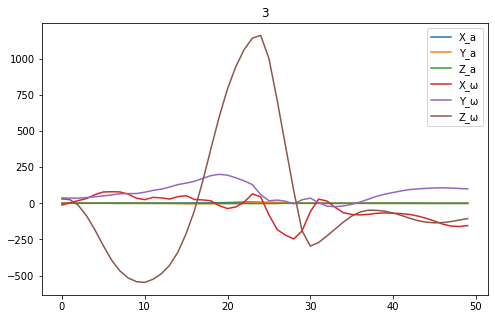

<Figure size 432x288 with 0 Axes>

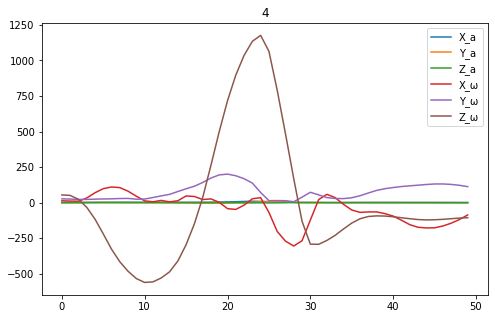

<Figure size 432x288 with 0 Axes>

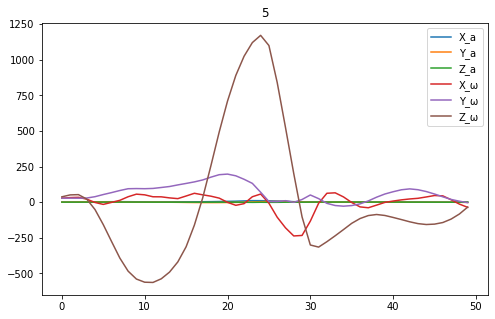

<Figure size 432x288 with 0 Axes>

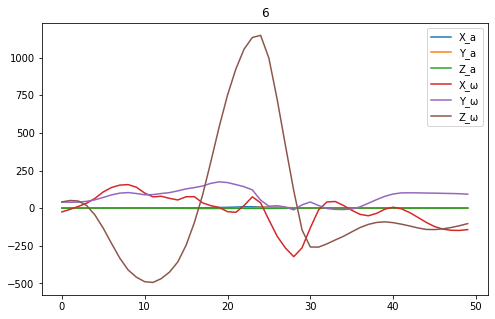

<Figure size 432x288 with 0 Axes>

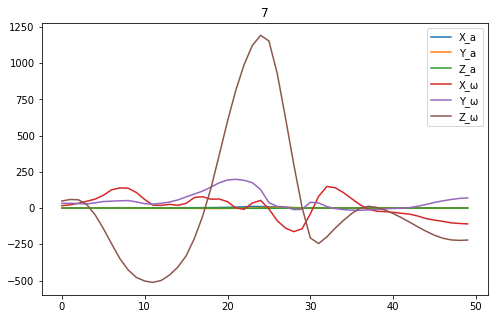

<Figure size 432x288 with 0 Axes>

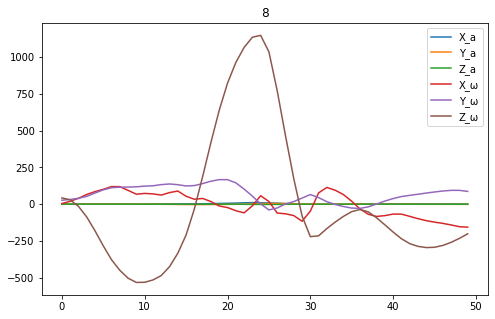

<Figure size 432x288 with 0 Axes>

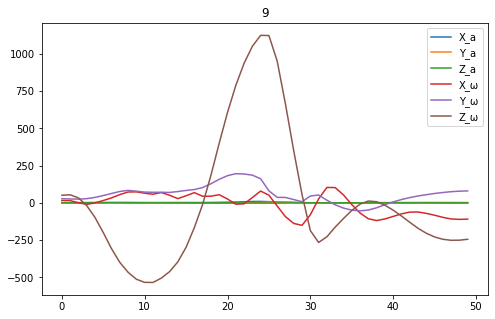

<Figure size 432x288 with 0 Axes>

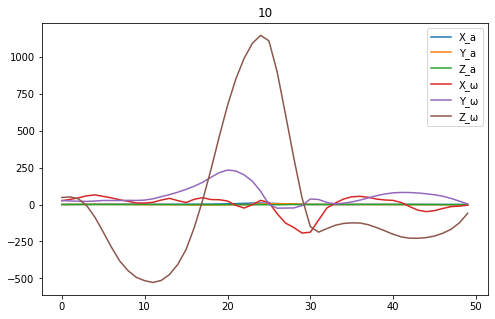

<Figure size 432x288 with 0 Axes>

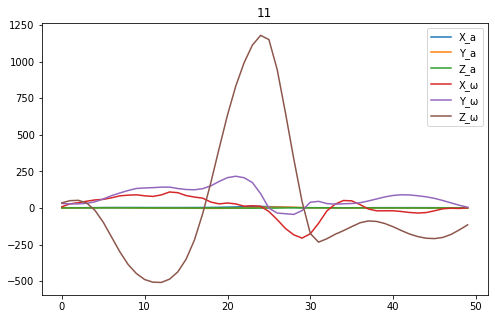

<Figure size 432x288 with 0 Axes>

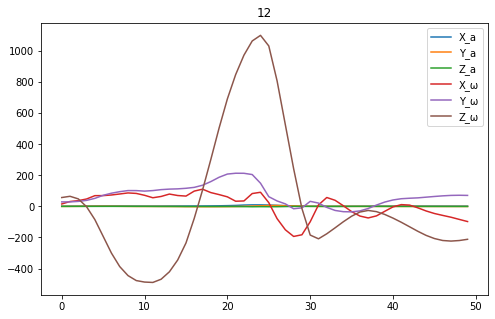

<Figure size 432x288 with 0 Axes>

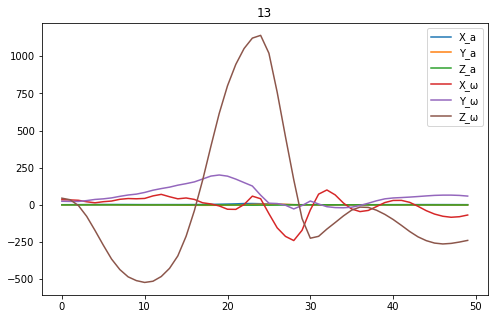

<Figure size 432x288 with 0 Axes>

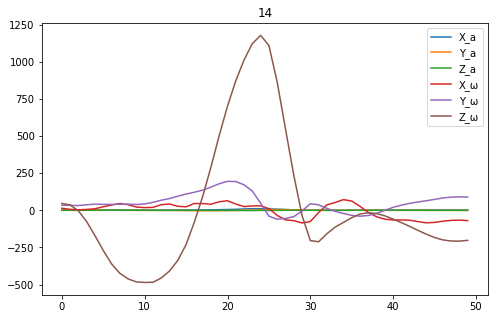

<Figure size 432x288 with 0 Axes>

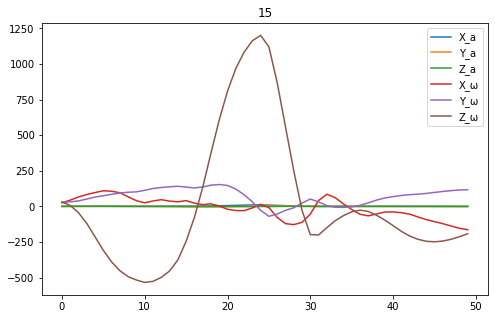

<Figure size 432x288 with 0 Axes>

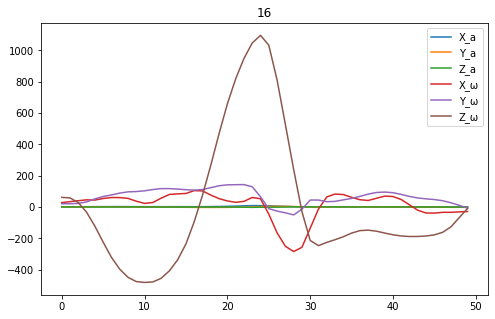

<Figure size 432x288 with 0 Axes>

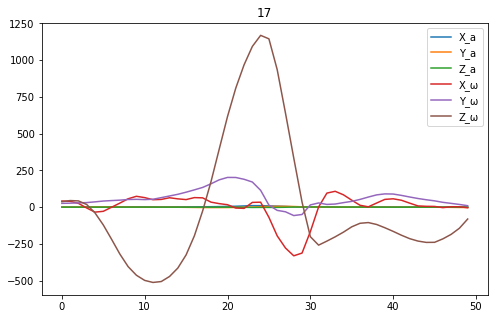

<Figure size 432x288 with 0 Axes>

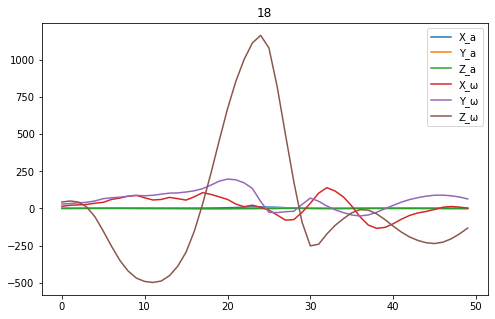

<Figure size 432x288 with 0 Axes>

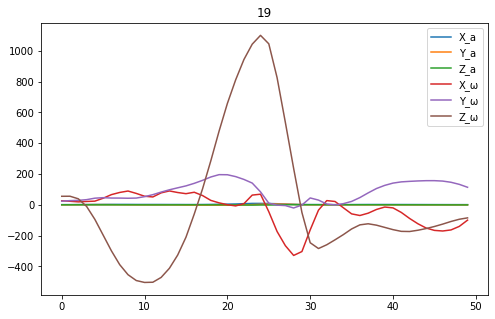

<Figure size 432x288 with 0 Axes>

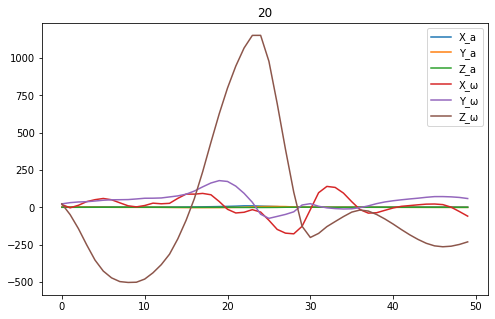

<Figure size 432x288 with 0 Axes>

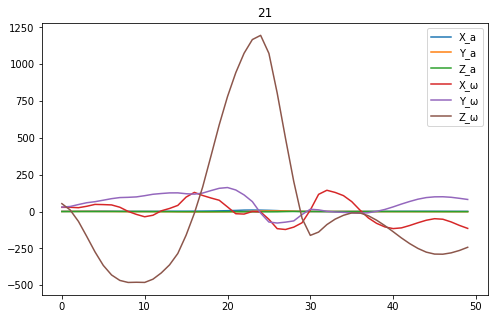

<Figure size 432x288 with 0 Axes>

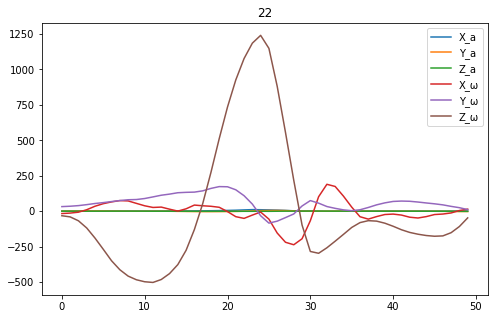

<Figure size 432x288 with 0 Axes>

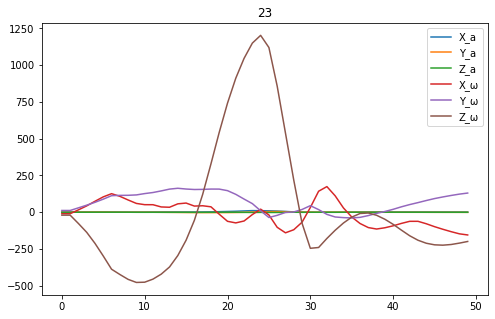

<Figure size 432x288 with 0 Axes>

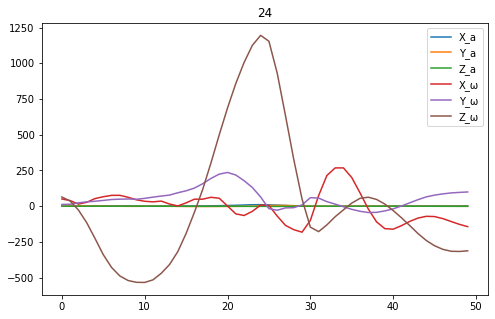

<Figure size 432x288 with 0 Axes>

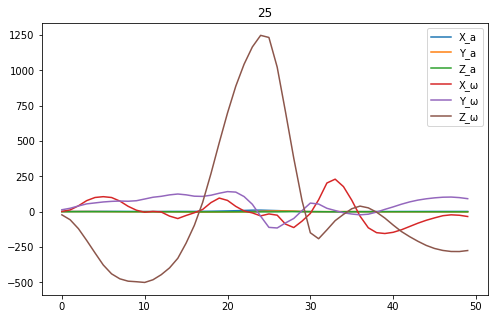

<Figure size 432x288 with 0 Axes>

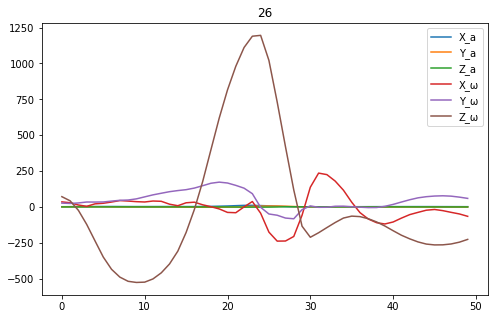

<Figure size 432x288 with 0 Axes>

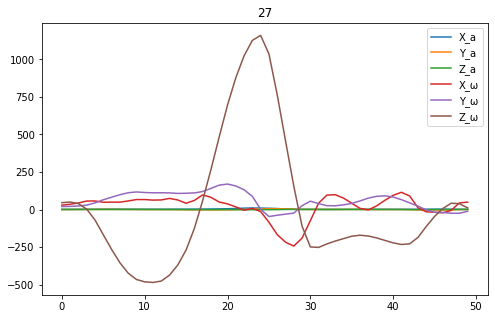

<Figure size 432x288 with 0 Axes>

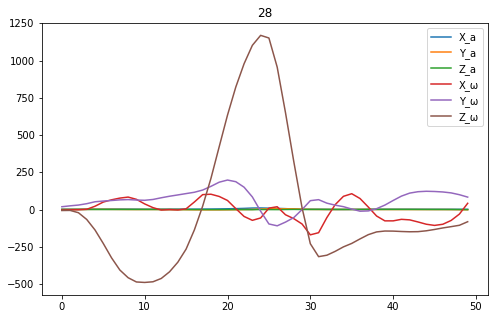

<Figure size 432x288 with 0 Axes>

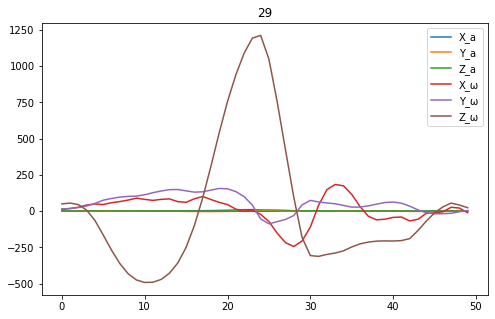

<Figure size 432x288 with 0 Axes>

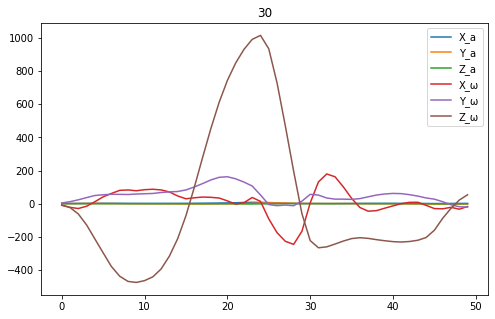

<Figure size 432x288 with 0 Axes>

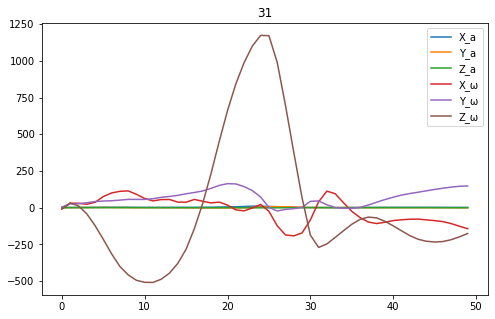

<Figure size 432x288 with 0 Axes>

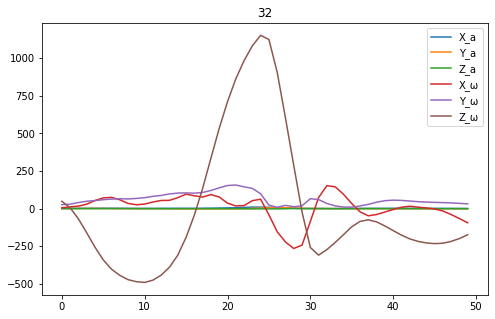

<Figure size 432x288 with 0 Axes>

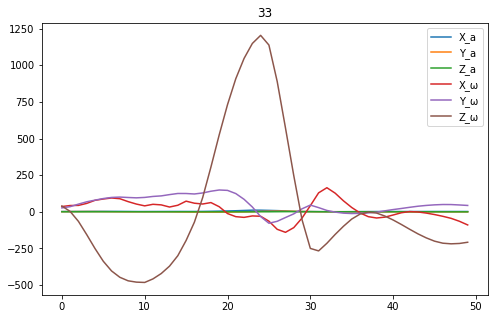

<Figure size 432x288 with 0 Axes>

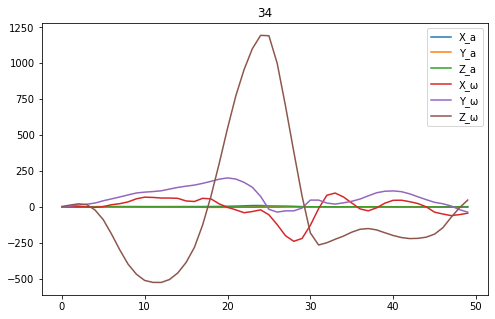

<Figure size 432x288 with 0 Axes>

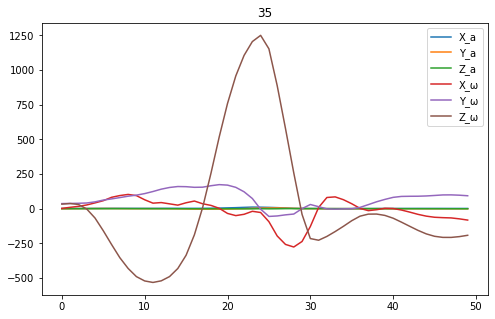

<Figure size 432x288 with 0 Axes>

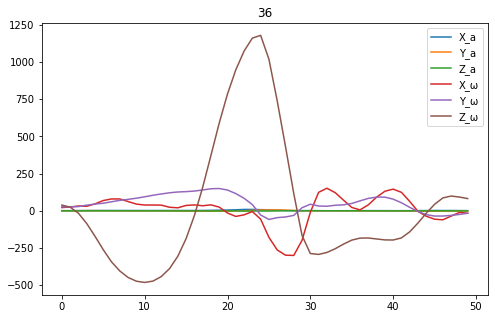

<Figure size 432x288 with 0 Axes>

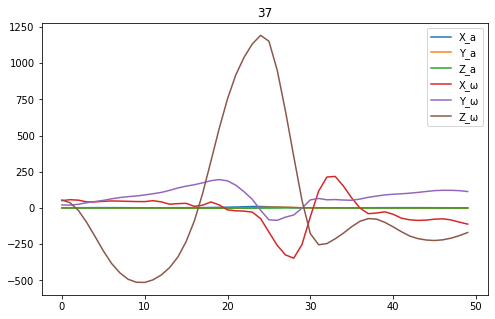

<Figure size 432x288 with 0 Axes>

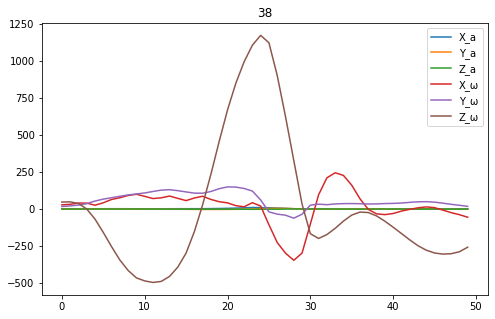

<Figure size 432x288 with 0 Axes>

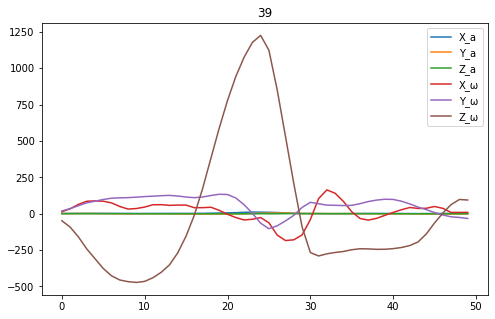

<Figure size 432x288 with 0 Axes>

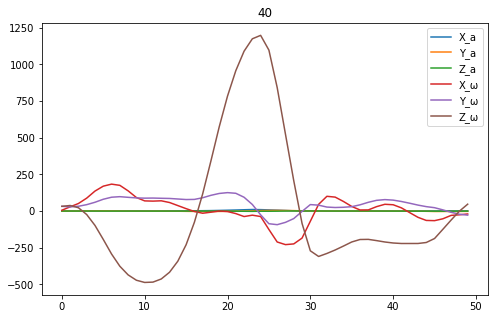

<Figure size 432x288 with 0 Axes>

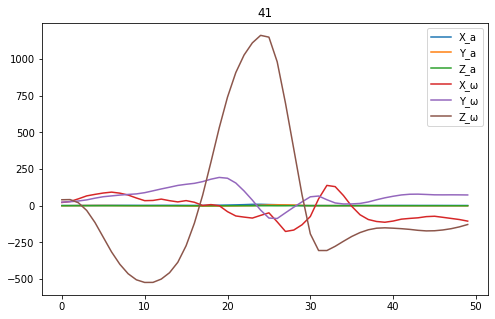

<Figure size 432x288 with 0 Axes>

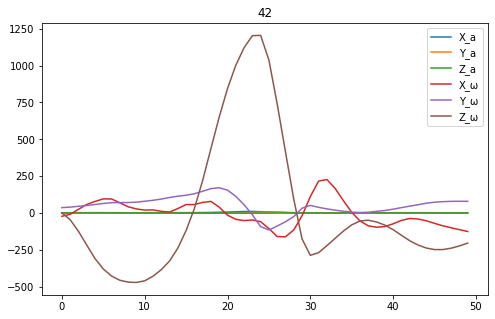

<Figure size 432x288 with 0 Axes>

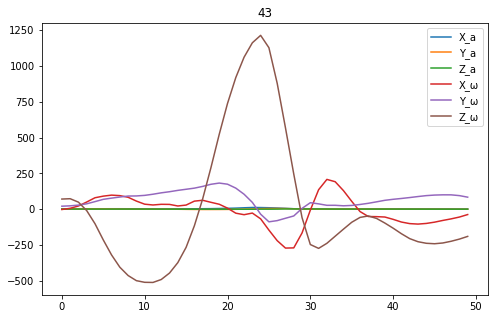

<Figure size 432x288 with 0 Axes>

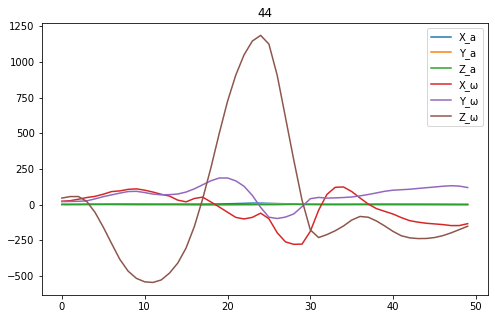

<Figure size 432x288 with 0 Axes>

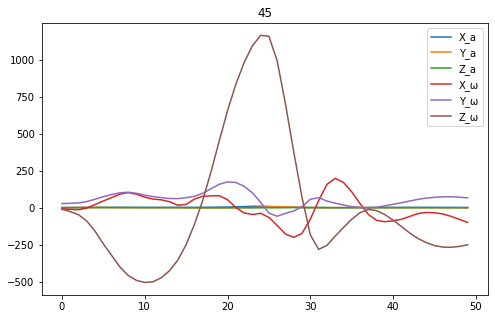

<Figure size 432x288 with 0 Axes>

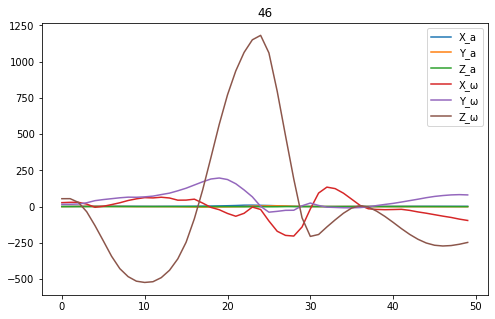

<Figure size 432x288 with 0 Axes>

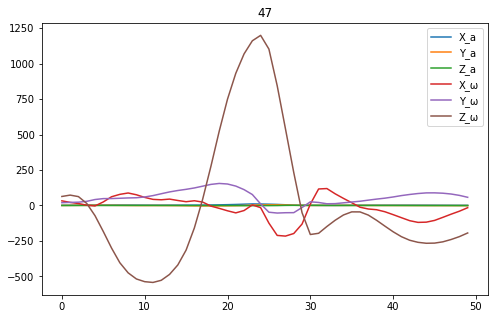

<Figure size 432x288 with 0 Axes>

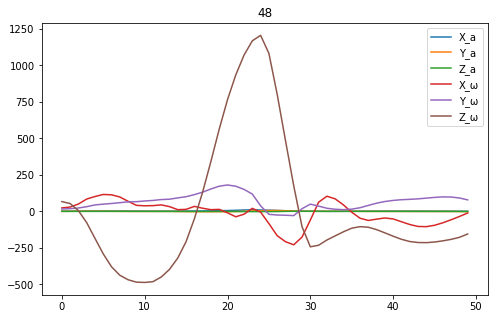

<Figure size 432x288 with 0 Axes>

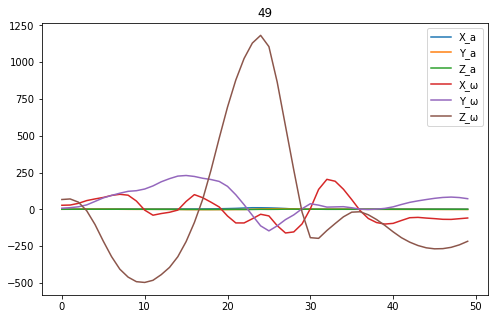

<Figure size 432x288 with 0 Axes>

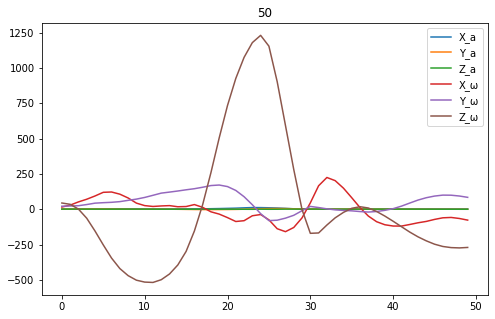

<Figure size 432x288 with 0 Axes>

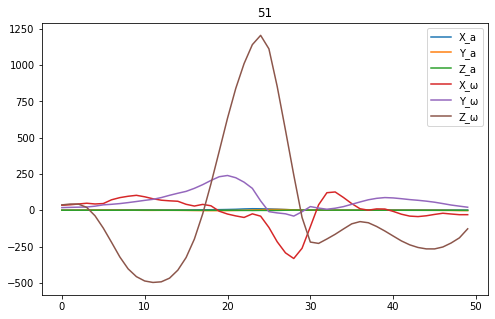

<Figure size 432x288 with 0 Axes>

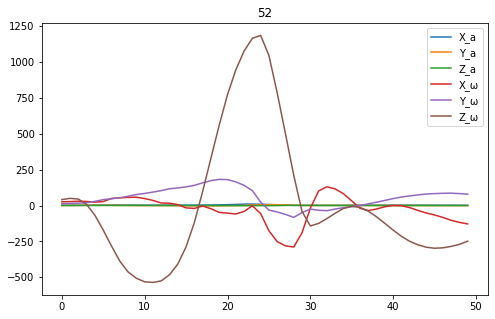

<Figure size 432x288 with 0 Axes>

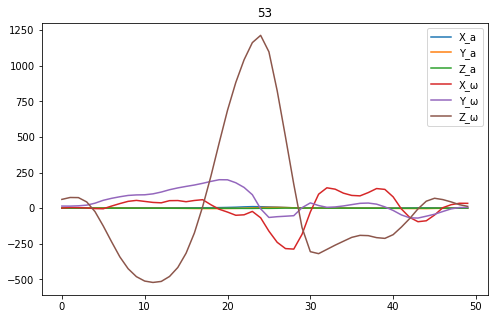

<Figure size 432x288 with 0 Axes>

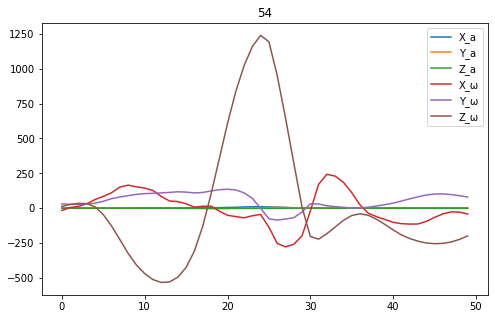

<Figure size 432x288 with 0 Axes>

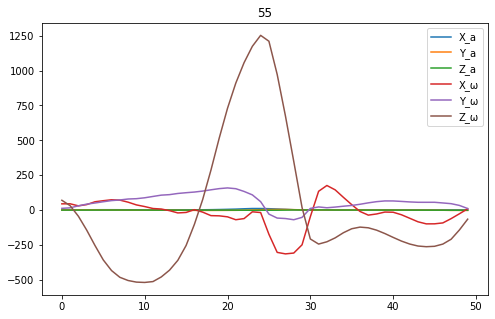

<Figure size 432x288 with 0 Axes>

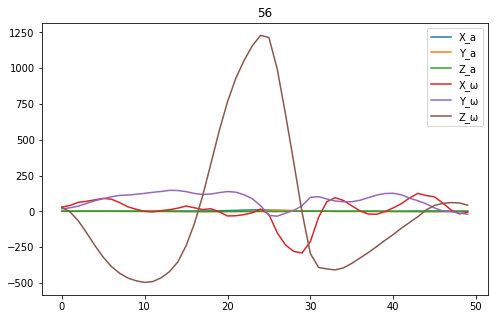

<Figure size 432x288 with 0 Axes>

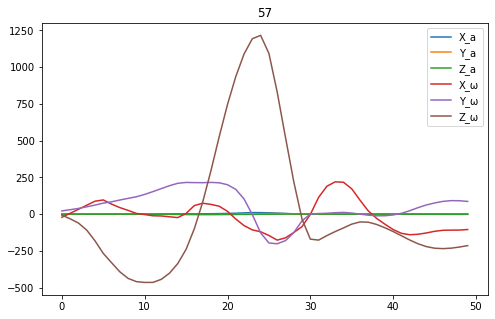

<Figure size 432x288 with 0 Axes>

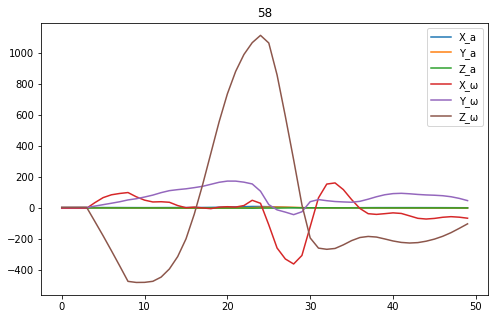

<Figure size 432x288 with 0 Axes>

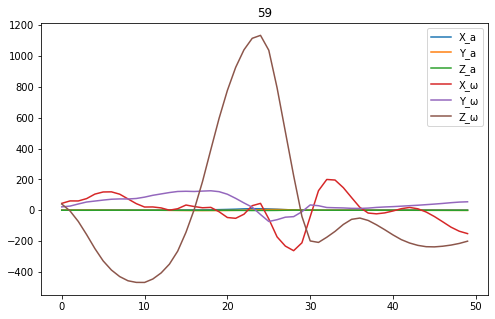

<Figure size 432x288 with 0 Axes>

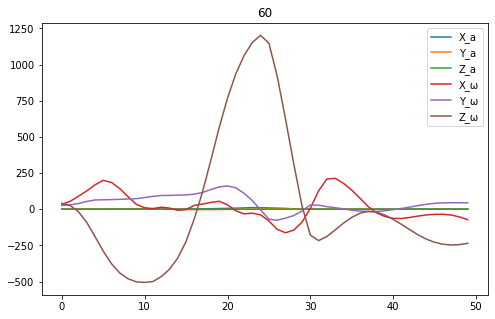

<Figure size 432x288 with 0 Axes>

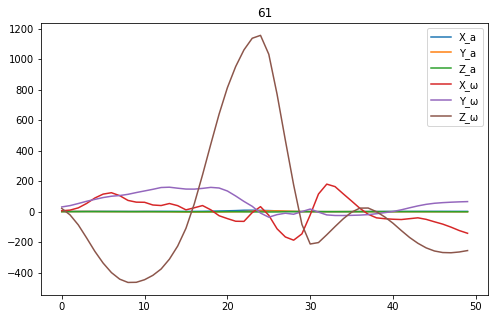

<Figure size 432x288 with 0 Axes>

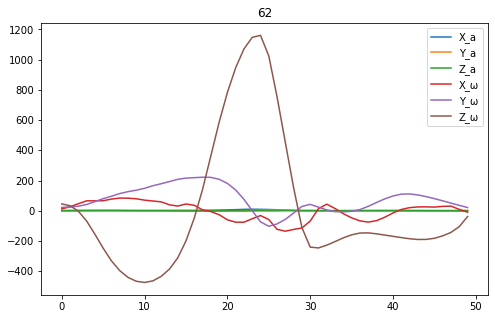

<Figure size 432x288 with 0 Axes>

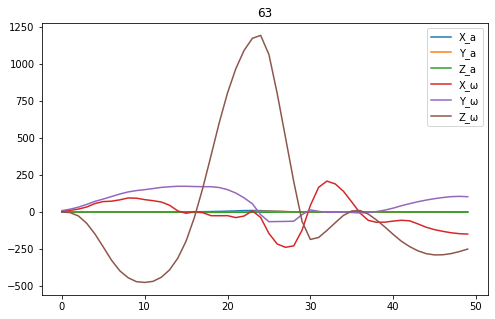

<Figure size 432x288 with 0 Axes>

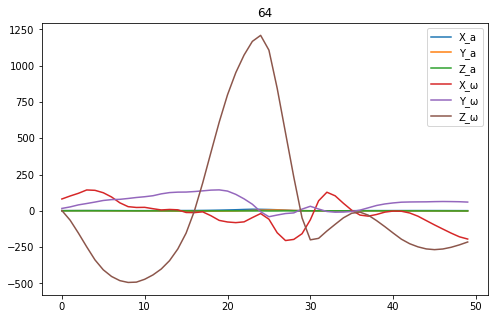

<Figure size 432x288 with 0 Axes>

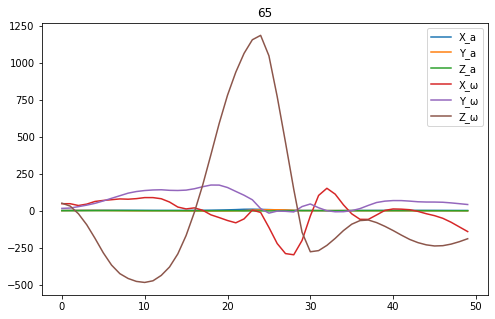

<Figure size 432x288 with 0 Axes>

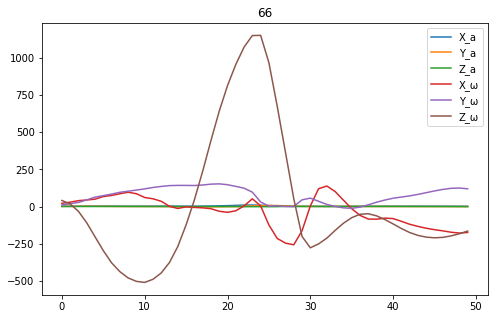

<Figure size 432x288 with 0 Axes>

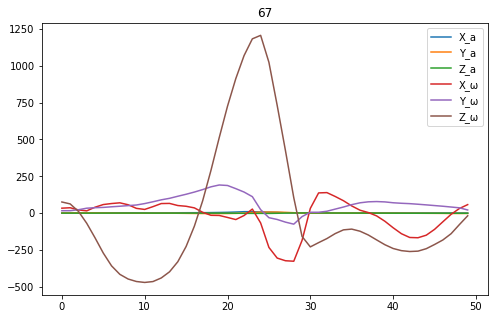

<Figure size 432x288 with 0 Axes>

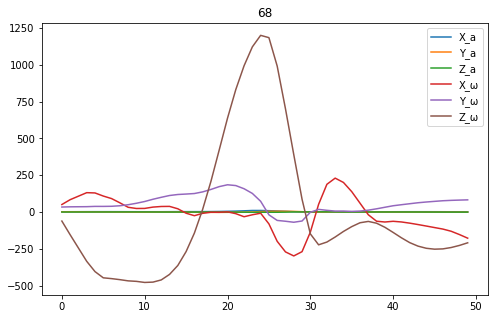

<Figure size 432x288 with 0 Axes>

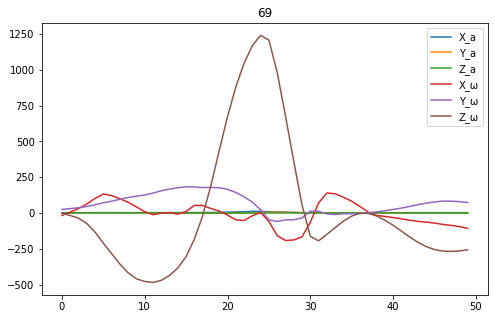

<Figure size 432x288 with 0 Axes>

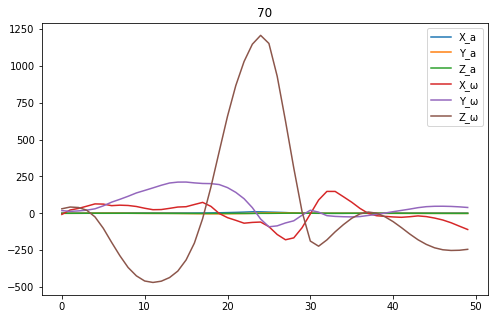

<Figure size 432x288 with 0 Axes>

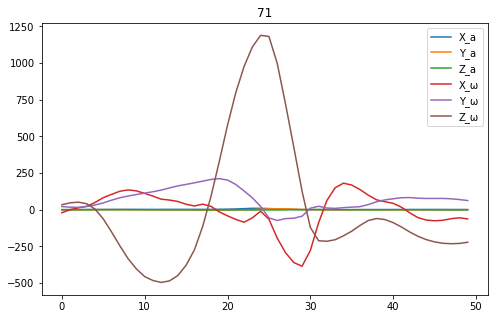

<Figure size 432x288 with 0 Axes>

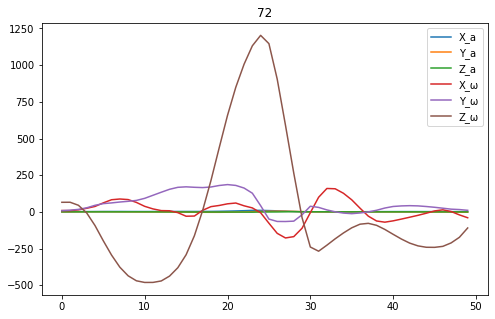

<Figure size 432x288 with 0 Axes>

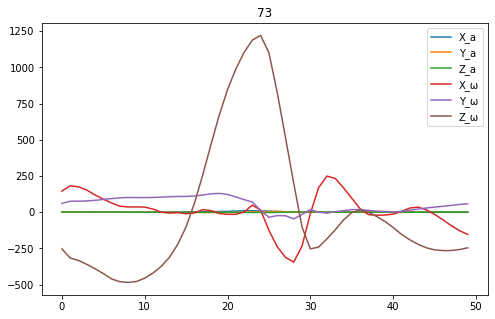

<Figure size 432x288 with 0 Axes>

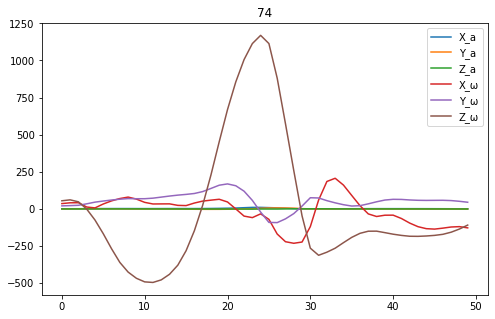

<Figure size 432x288 with 0 Axes>

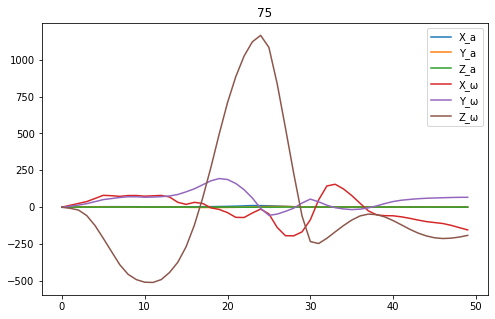

<Figure size 432x288 with 0 Axes>

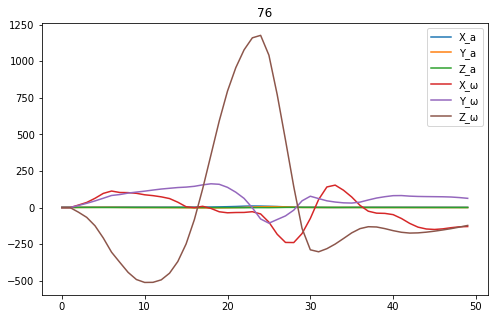

<Figure size 432x288 with 0 Axes>

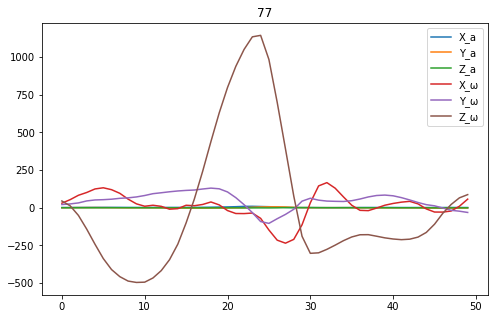

<Figure size 432x288 with 0 Axes>

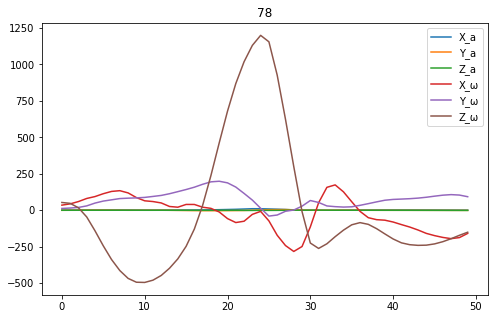

<Figure size 432x288 with 0 Axes>

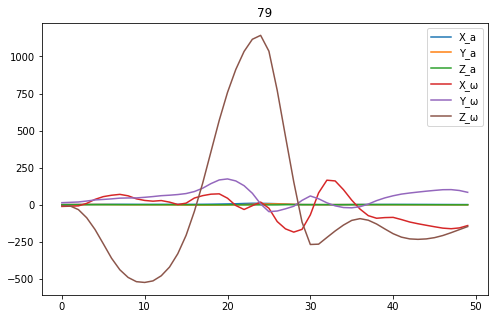

<Figure size 432x288 with 0 Axes>

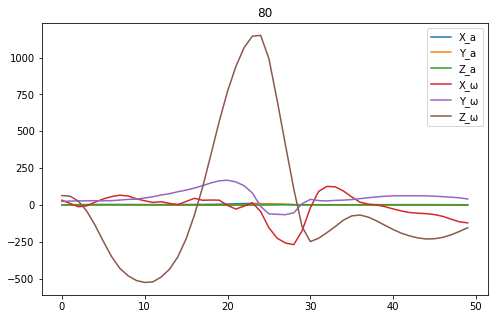

<Figure size 432x288 with 0 Axes>

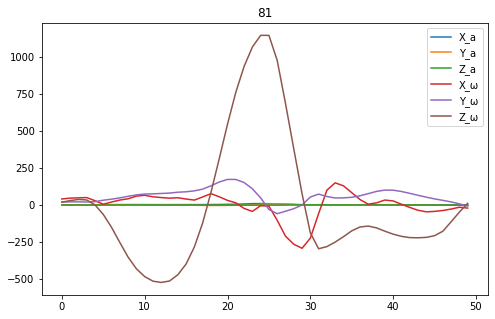

<Figure size 432x288 with 0 Axes>

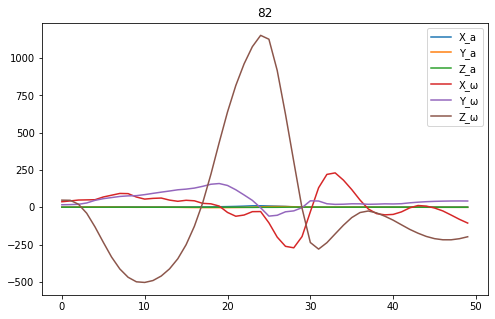

<Figure size 432x288 with 0 Axes>

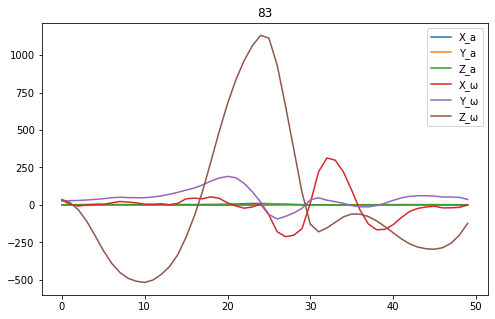

<Figure size 432x288 with 0 Axes>

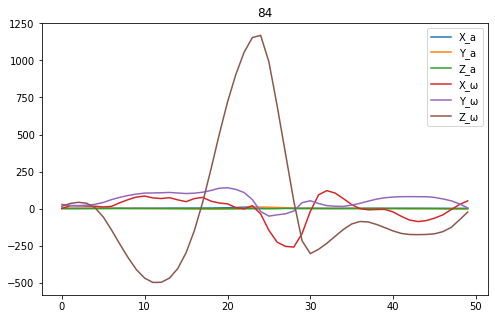

<Figure size 432x288 with 0 Axes>

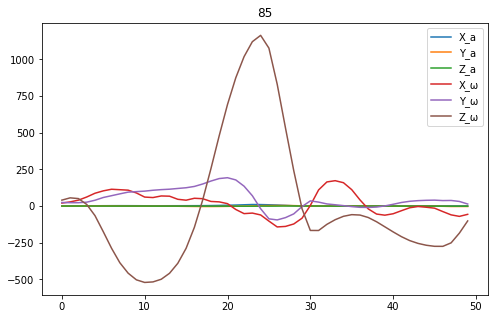

<Figure size 432x288 with 0 Axes>

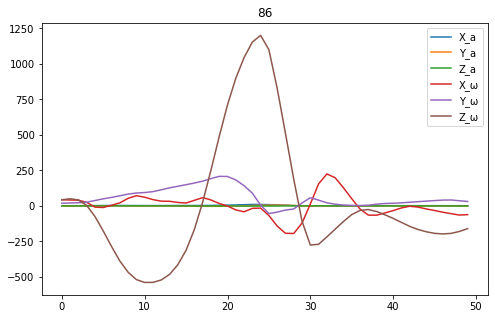

<Figure size 432x288 with 0 Axes>

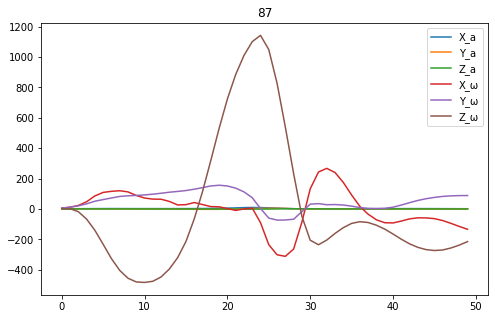

<Figure size 432x288 with 0 Axes>

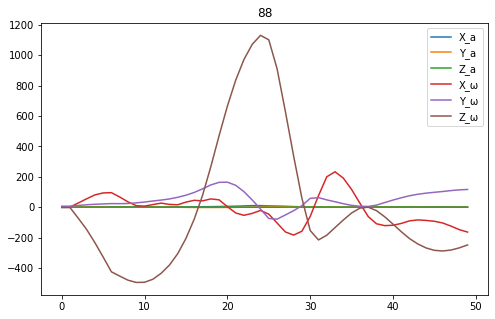

<Figure size 432x288 with 0 Axes>

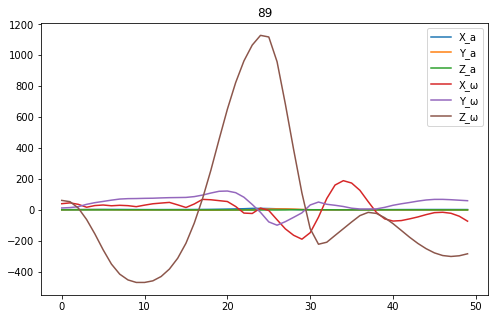

<Figure size 432x288 with 0 Axes>

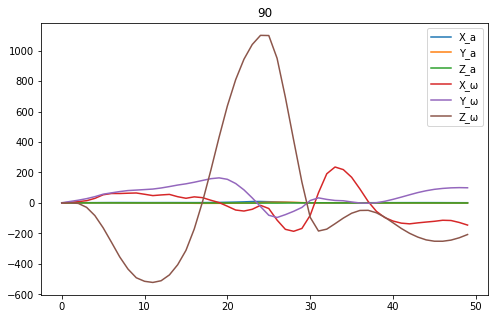

<Figure size 432x288 with 0 Axes>

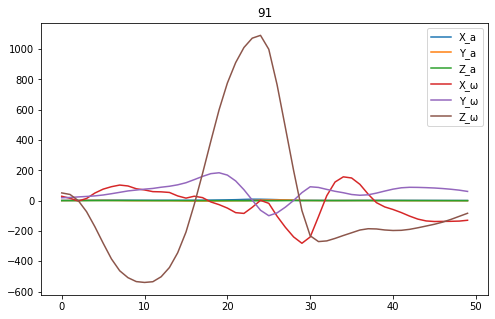

<Figure size 432x288 with 0 Axes>

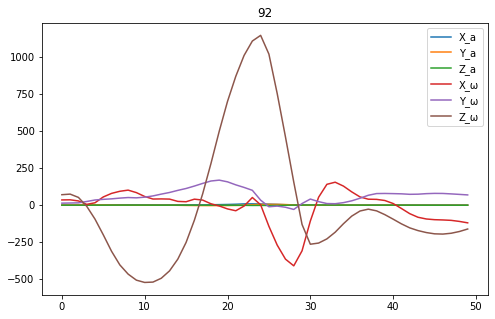

<Figure size 432x288 with 0 Axes>

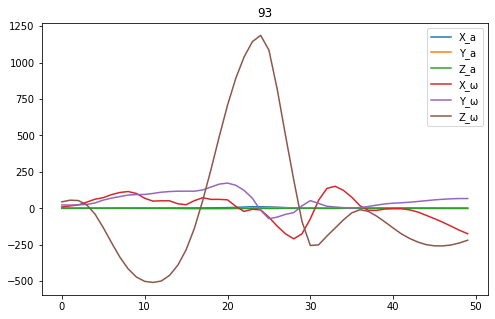

<Figure size 432x288 with 0 Axes>

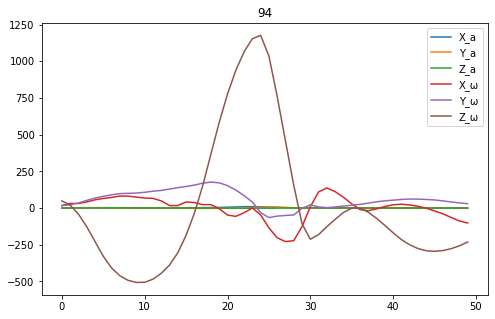

<Figure size 432x288 with 0 Axes>

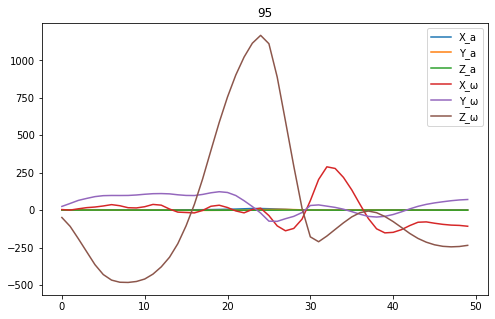

<Figure size 432x288 with 0 Axes>

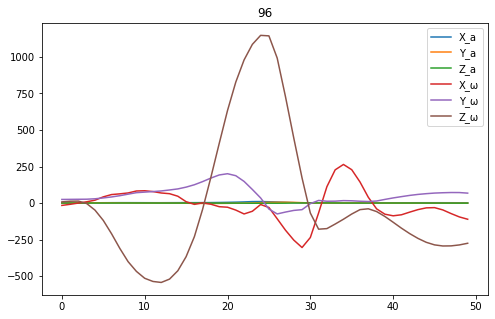

<Figure size 432x288 with 0 Axes>

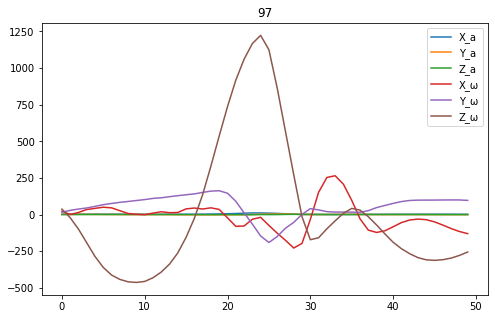

<Figure size 432x288 with 0 Axes>

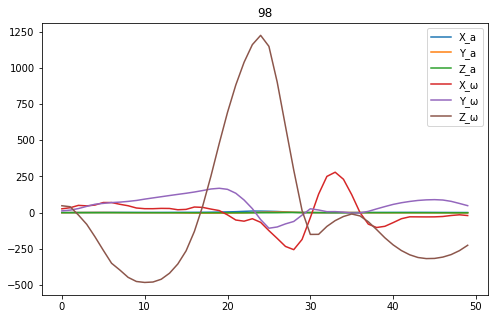

<Figure size 432x288 with 0 Axes>

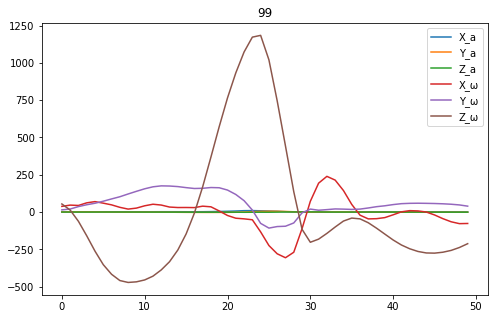

<Figure size 432x288 with 0 Axes>

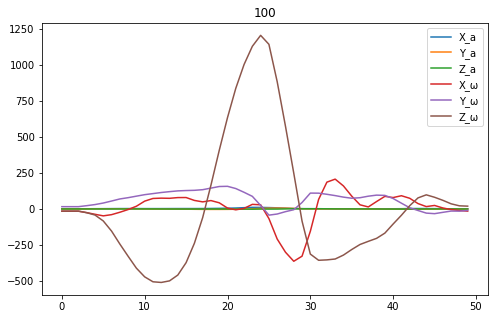

<Figure size 432x288 with 0 Axes>

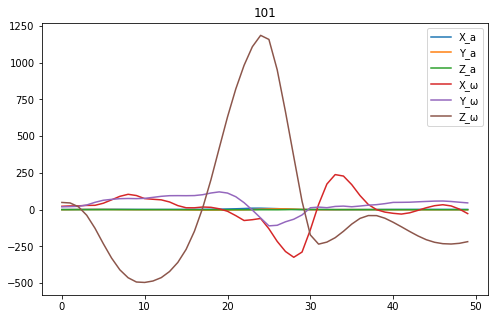

<Figure size 432x288 with 0 Axes>

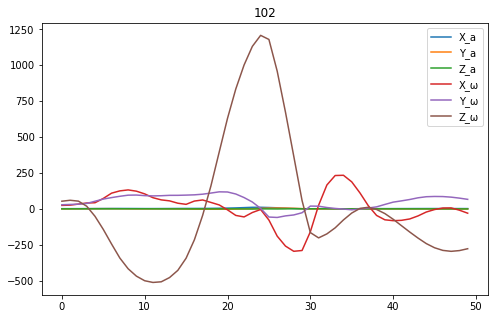

<Figure size 432x288 with 0 Axes>

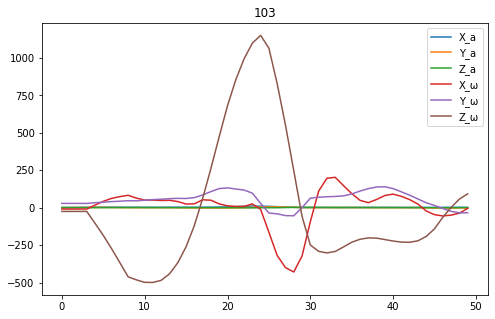

<Figure size 432x288 with 0 Axes>

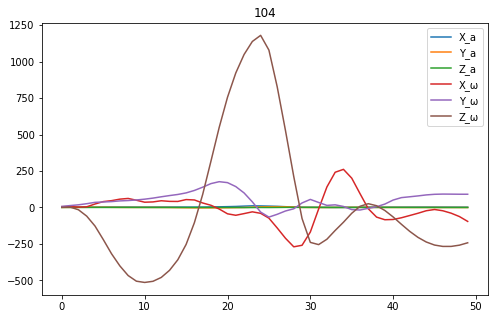

<Figure size 432x288 with 0 Axes>

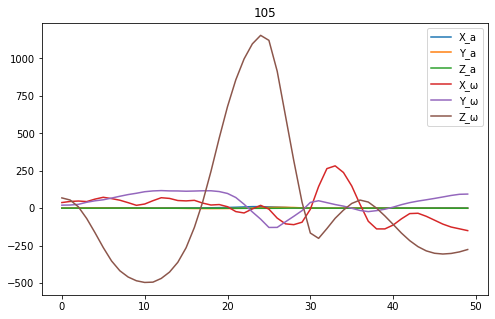

<Figure size 432x288 with 0 Axes>

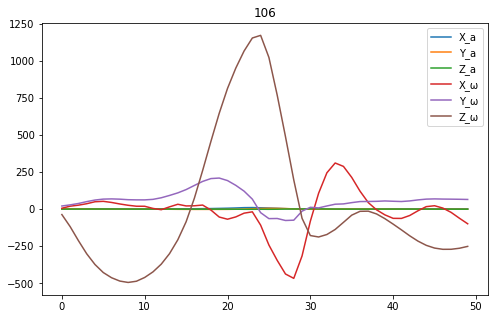

<Figure size 432x288 with 0 Axes>

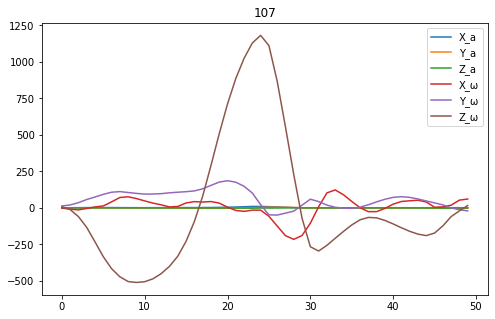

<Figure size 432x288 with 0 Axes>

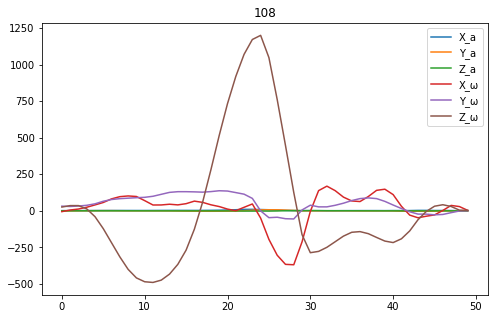

<Figure size 432x288 with 0 Axes>

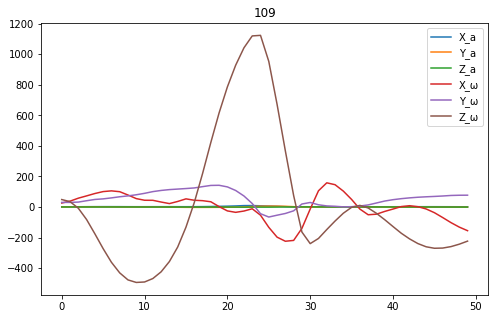

<Figure size 432x288 with 0 Axes>

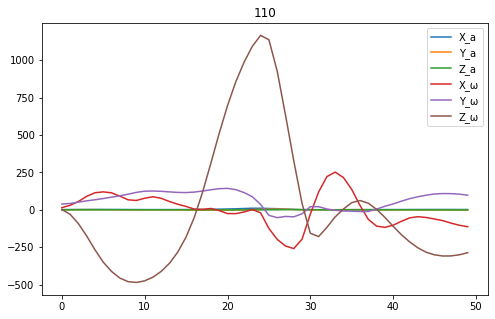

<Figure size 432x288 with 0 Axes>

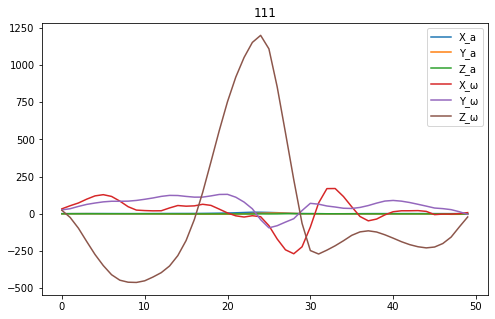

<Figure size 432x288 with 0 Axes>

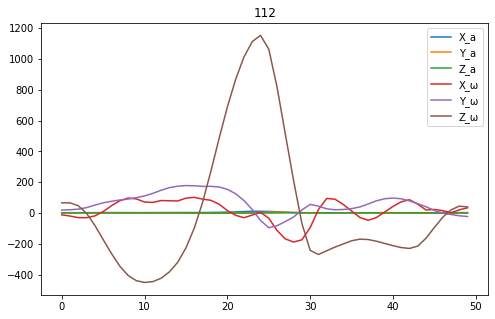

<Figure size 432x288 with 0 Axes>

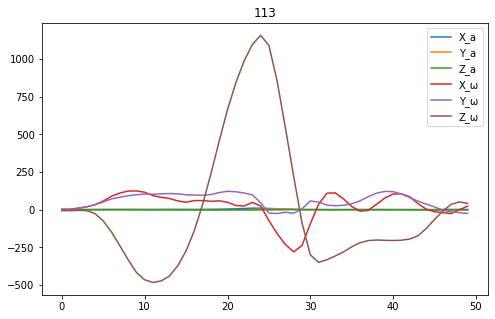

<Figure size 432x288 with 0 Axes>

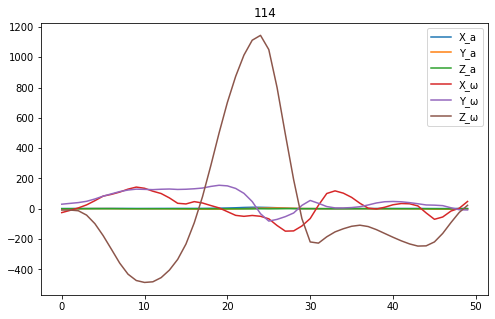

<Figure size 432x288 with 0 Axes>

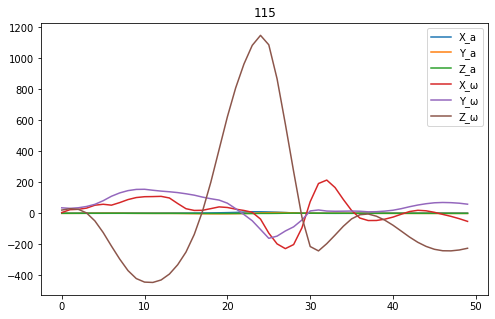

<Figure size 432x288 with 0 Axes>

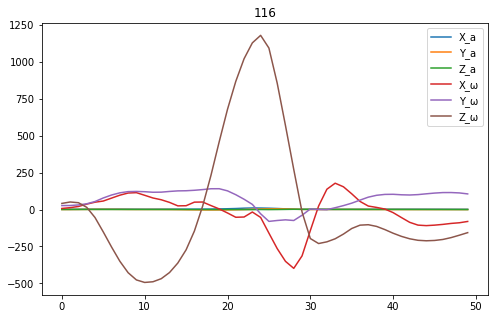

<Figure size 432x288 with 0 Axes>

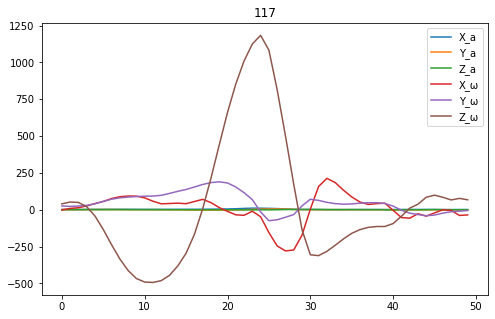

<Figure size 432x288 with 0 Axes>

In [8]:
for i in range(len(df)):
    df[i].plot(figsize=(8,5),title=i)
    plt.show()
    plt.clf()

In [9]:
df_save = pd.DataFrame()
for i in range(0,len(df)):
    df_save = df_save.append(df[i])

In [10]:
df_save

X_a       Y_a       Z_a        X_ω        Y_ω         Z_ω
0   1.518164  0.731055  0.118262 -26.951220  14.341464  -39.378049
1   1.673730  0.981445  0.139746 -29.085367  23.500001  -74.914635
2   1.855078  1.157617  0.176660 -24.207318  34.487805 -125.134147
3   2.030957  1.170996  0.259375  -1.451220  40.865854 -182.804883
4   2.160352  1.001563  0.292871  29.670732  46.792684 -249.000004
..       ...       ...       ...        ...        ...         ...
45  1.751855 -0.065039  0.438672 -21.865851 -36.414635   98.804879
46  0.895996 -0.021875  0.074805  -0.378046 -23.280489   84.439025
47  0.826172 -0.501758 -0.241113  -4.304876 -13.670732   66.280489
48  0.900977 -0.462891 -0.045898 -38.939025 -10.085366   76.878050
49  0.954297 -0.608984 -0.028320 -35.512196  -5.780488   67.146342

[5900 rows x 6 columns]

In [11]:
df_save.to_excel('nwt_fq_4_10_cut.xlsx')